# Demo of getting waveform from EPICS

## Import packages

`numpy` for better arrays
`pyplot` for plotting
`os` for accessing environment variables

`EPICS_CA_ADDR_LIST` and `EPICS_CA_SERVER_PORT`sets the list of IPs and the port `pyepics` will broadcast to when you ask for variabless

Port is only necessary is talking to the virtual accelerator

The rest you don't need to understand

`epics` is for talking to the accelerator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

VIRTUAL = False

if VIRTUAL:
    os.environ['EPICS_CA_ADDR_LIST'] = ''
    os.environ['EPICS_CA_SERVER_PORT'] = ''
    vm = 'VM-'
else:
    os.environ['EPICS_CA_ADDR_LIST'] = "192.168.83.255 192.168.119.255 192.168.125.50 129.168.125.51 192.168.125.52 192.168.125.59 192.168.125.54 192.168.125.58 192.168.125.57 192.168.125.130 192.168.113.29"
    vm = ''

os.environ['EPICS_CA_AUTO_ADDR_LIST'] = 'NO'
os.environ['EPICS_CA_MAX_ARRAY_BYTES'] = '10000000'

import epics

## Getting a scalar

`epics.caget` is a very simple way, doesn't maintain connection

`epics.PV` is an object that maintains connection - Better for monitoring (getting values every time something changes)

In [3]:
PVName = f'{vm}CLA-S01-VAC-VALV-01:Sta'
# The {vm} is a prefix for the virtual machine, it is empty if the script is targeting the real machine
# This is the standard way we name PVs on CLARA.
#   CLA means CLARA, S01 means it is in section 1
#   VAC means it relates to vacuum, VALV means it is a valve
#   01 is the number of the valve in that section
#  :Sta is the suffix that indicates the status of the valve (0, 1 or 2 for closed, open and moving)

print(PVName)

value = epics.caget(PVName)
print(value)

pvo = epics.PV(PVName)
value = pvo.get()
print(value)

CLA-S01-VAC-VALV-01:Sta
0
0


## Getting some number of scalars and storing them

For this we have to use the PV object and add something called a callback function. This means that the background EPICS library will listen for updates to the value, and whenever the value updates it will execute a function.

What we'll do is create a numpy vector of zeros to hold the data, then for every time there's a new value we will:
    roll the numpy vector once (so that the last value is zero)
    store the new value in the final slot of the vector

Then we'll just plot that vector

Test -> 0
Test -> 1
Test -> 2
Test -> 3
Test -> 4
Test -> 5
Test -> 6
Test -> 7
Test -> 8
Test -> 9
Test -> 10
Test -> 11
Test -> 12
Test -> 13
Test -> 14
Test -> 15
Test -> 16
Test -> 17
Test -> 18
Test -> 19
Test -> 20
Test -> 21
Test -> 22
Test -> 23
Test -> 24
Test -> 25
Test -> 26
Test -> 27
Test -> 28
Test -> 29
Test -> 30
Test -> 31
Test -> 32
Test -> 33
Test -> 34
Test -> 35
Test -> 36
Test -> 37
Test -> 38
Test -> 39
Test -> 40
Test -> 41
Test -> 42
Test -> 43
Test -> 44
Test -> 45
Test -> 46
Test -> 47
Test -> 48
Test -> 49
Test -> 50
Test -> 51
Test -> 52
Test -> 53
Test -> 54
Test -> 55
Test -> 56
Test -> 57
Test -> 58
Test -> 59
Test -> 60
Test -> 61
Test -> 62
Test -> 63
Test -> 64
Test -> 65
Test -> 66
Test -> 67
Test -> 68
Test -> 69
Test -> 70
Test -> 71
Test -> 72
Test -> 73
Test -> 74
Test -> 75
Test -> 76
Test -> 77
Test -> 78
Test -> 79
Test -> 80
Test -> 81
Test -> 82
Test -> 83
Test -> 84
Test -> 85
Test -> 86
Test -> 87
Test -> 88
Test -> 89
Test -> 90
Test -> 9

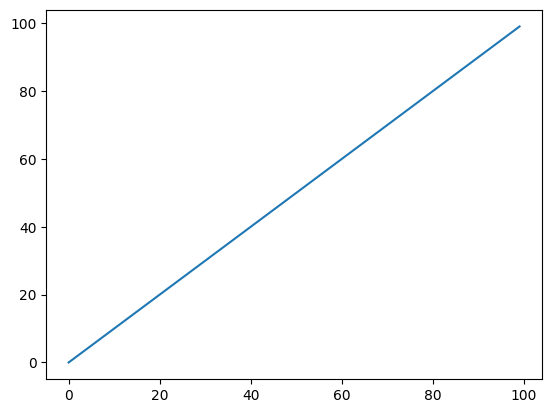

In [10]:
n = 100 # Take 100 shots

class data_store: #Create an object to store the data in
    def __init__(self, n):
        self.storage_vector = np.zeros((n, 1)) #Initialize the storage vector
    
    def on_new_value(self, pvname, value, **kws): #This function will be called on each new value
        print(f'{pvname} -> {value}')
        self.storage_vector = np.roll(self.storage_vector, -1) #Shift the storage vector
        self.storage_vector[-1] = value #Store new value at the last position

    def _test(self, n): #Test function
        for i in range(n):
            self.on_new_value("Test", i)

ds = data_store(n) #Create an instance of the data_store class
ds._test(n) #Run the test function

plt.plot(ds.storage_vector)
plt.show() #Plot the test data (should be a ramp to 99)


### Now with EPICS

CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.160365582953805
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0602756566179268
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9778426453077121
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3887817958627426
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3634073713268557
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2428584340510622
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.1963600975442843
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0636622474307396
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.193451132787667
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.634768436751396
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0314265634919926
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9380645189360185
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.6291401725294963
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9922193618049917
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Powe

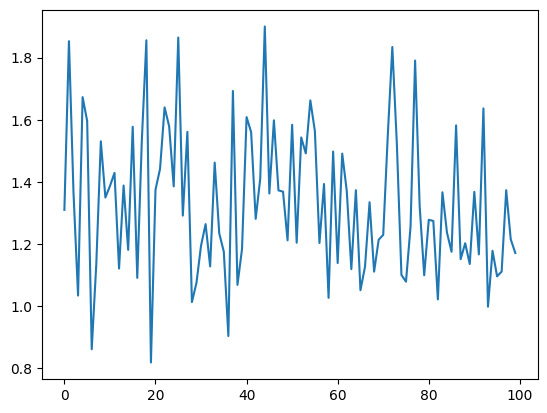

In [12]:
from time import perf_counter #We want to be able to count time

n = 100 # Take 100 shots

class data_store: #Create an object to store the data in
    def __init__(self, n, PVName):
        self.storage_vector = np.zeros((n, 1)) #Initialize the storage vector (Note that we've actually created a rolling buffer. CLARA runs at 100 Hz, so we're storing 1 second of data)
        self.pvo = epics.PV(PVName)

    def start(self):
        self.pvo.add_callback(self.on_new_value)
    
    def stop(self):
        self.pvo.clear_callbacks()

    def on_new_value(self, pvname, value, **kws): #This function will be called on each new value
        print(f'{pvname} -> {value}')
        self.storage_vector = np.roll(self.storage_vector, -1) #Shift the storage vector
        self.storage_vector[-1] = value #Store new value at the last position

    def _test(self, n): #Test function
        for i in range(n):
            self.on_new_value("Test", i)

PVName = f'{vm}CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg' #This is a PV that updates every shot (RF power)

ds = data_store(n, PVName) #Create an instance of the data_store class

start = perf_counter() #This starts the timer

ds.start() #Start the callback

while perf_counter() - start < 2: #Run for 2 seconds
    pass

ds.stop() #Stop the callback

plt.plot(ds.storage_vector)
plt.show() #Plot the test data (should be a ramp to 99)
